#  EDA on Medical Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go

In [81]:
df=pd.read_csv('/Users/poochoud2/PycharmProjects/medical_qna_chatbot/data/medical_data.csv')

In [83]:
df

,input,output
0,What are the treatments for Sickle Cell Disease ?,Health Maintenance To Prevent Complications\n ...
1,What are the treatments for Overweight and Obe...,Successful weight-loss treatments include sett...
2,What are the treatments for Asthma ?,Asthma is a long-term disease that has no cure...
3,What are the treatments for Heart Valve Disease ?,"Currently, no medicines can cure heart valve d..."
4,What are the symptoms of Ehrlichiosis ?,Symptoms \n \nIn the United St...
...,...,...
12995,How many people are affected by genitopatellar...,Genitopatellar syndrome is estimated to occur ...
12996,How many people are affected by ADCY5-related ...,The prevalence of ADCY5-related dyskinesia is ...
12997,How many people are affected by 8p11 myeloprol...,The prevalence of 8p11 myeloproliferative synd...
12998,How many people are affected by CAV3-related d...,The prevalence of CAV3-related distal myopathy...


## BASIC DATA OVERVIEW

In [32]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")
print(f"Missing values:\n{df.isnull().sum()}")
df.head()

Dataset shape: (13000, 2)
Columns: ['input', 'output']
Data types:
input     object
output    object
dtype: object
Missing values:
input     0
output    0
dtype: int64


,input,output
0,What are the treatments for Sickle Cell Disease ?,Health Maintenance To Prevent Complications\n ...
1,What are the treatments for Overweight and Obe...,Successful weight-loss treatments include sett...
2,What are the treatments for Asthma ?,Asthma is a long-term disease that has no cure...
3,What are the treatments for Heart Valve Disease ?,"Currently, no medicines can cure heart valve d..."
4,What are the symptoms of Ehrlichiosis ?,Symptoms \n \nIn the United St...


## TEXT LENGTH ANALYSIS

In [87]:
# Calculate text lengths
df['input_length'] = df['input'].str.len()
df['output_length'] = df['output'].str.len()
df['input_word_count'] = df['input'].str.split().str.len()
df['output_word_count'] = df['output'].str.split().str.len()


In [89]:
# Text length statistics
print("\n=== TEXT LENGTH STATISTICS ===")
print("Input Length Stats:")
print(df['input_length'].describe())
print("\nOutput Length Stats:")
print(df['output_length'].describe())


=== TEXT LENGTH STATISTICS ===
Input Length Stats:
count    13000.000000
mean        50.357923
std         16.999807
min         16.000000
25%         38.000000
50%         48.000000
75%         60.000000
max        191.000000
Name: input_length, dtype: float64

Output Length Stats:
count    13000.000000
mean      1261.140385
std       1254.915933
min         46.000000
25%        534.000000
50%        899.000000
75%       1590.000000
max      24733.000000
Name: output_length, dtype: float64


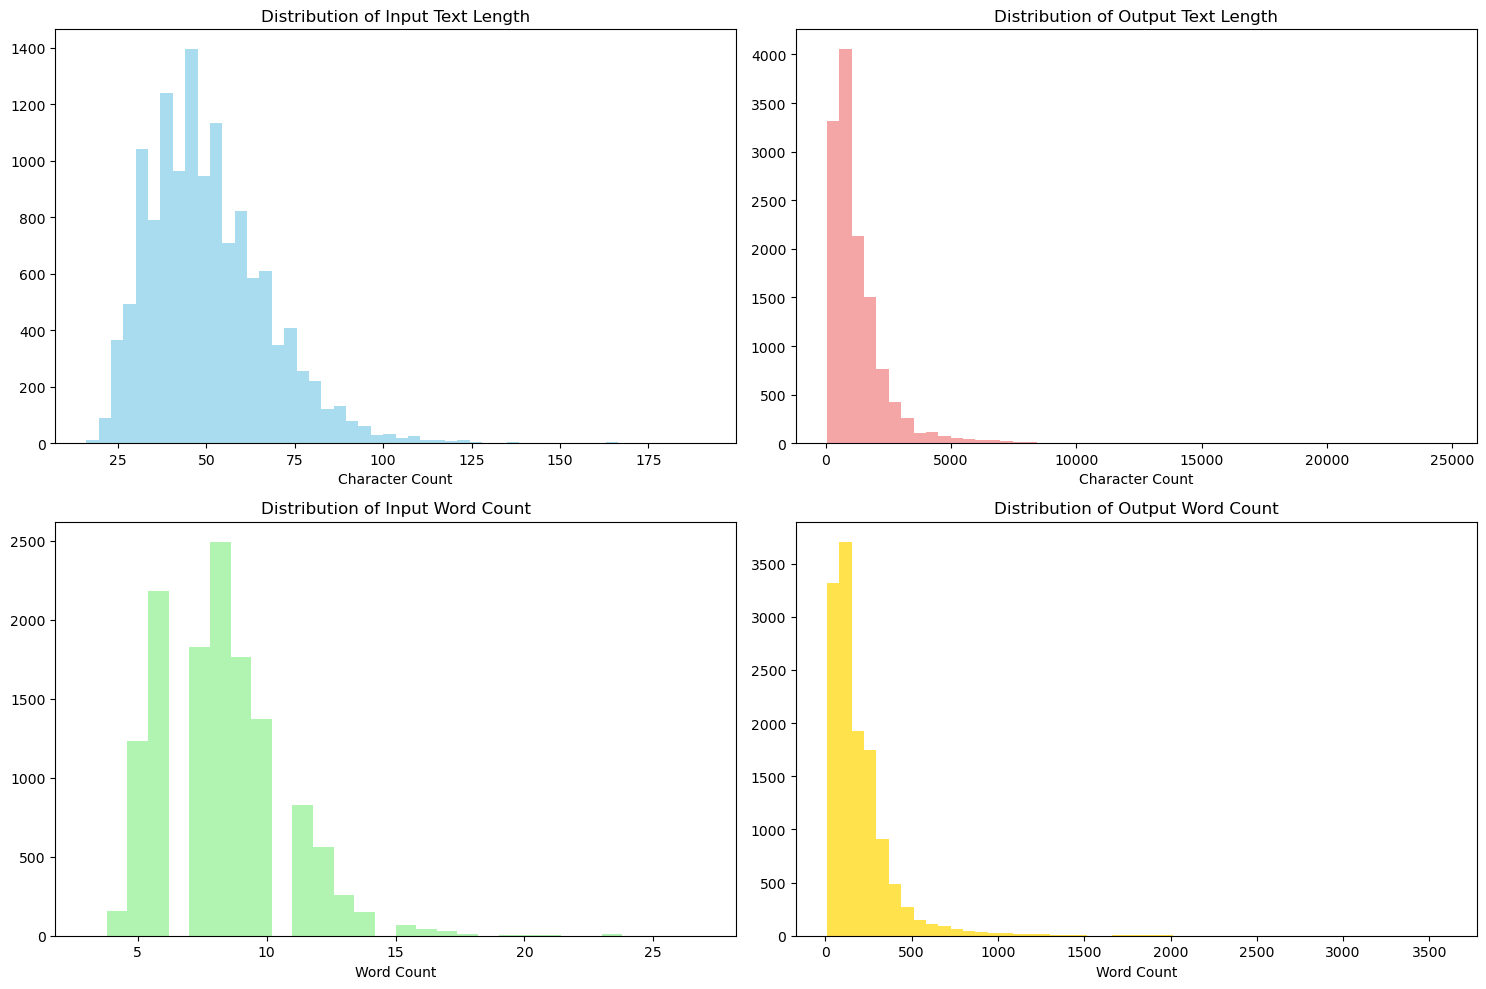

In [91]:
# Visualize text lengths
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Input length distribution
axes[0,0].hist(df['input_length'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Input Text Length')
axes[0,0].set_xlabel('Character Count')

# Output length distribution
axes[0,1].hist(df['output_length'], bins=50, alpha=0.7, color='lightcoral')
axes[0,1].set_title('Distribution of Output Text Length')
axes[0,1].set_xlabel('Character Count')

# Input word count
axes[1,0].hist(df['input_word_count'], bins=30, alpha=0.7, color='lightgreen')
axes[1,0].set_title('Distribution of Input Word Count')
axes[1,0].set_xlabel('Word Count')

# Output word count
axes[1,1].hist(df['output_word_count'], bins=50, alpha=0.7, color='gold')
axes[1,1].set_title('Distribution of Output Word Count')
axes[1,1].set_xlabel('Word Count')

plt.tight_layout()
plt.show()

##  QUESTION TYPE ANALYSIS


 QUESTION TYPE DISTRIBUTION 
question_type
What     10141
How       1446
Other     1138
Who        274
Where        1
Name: count, dtype: int64


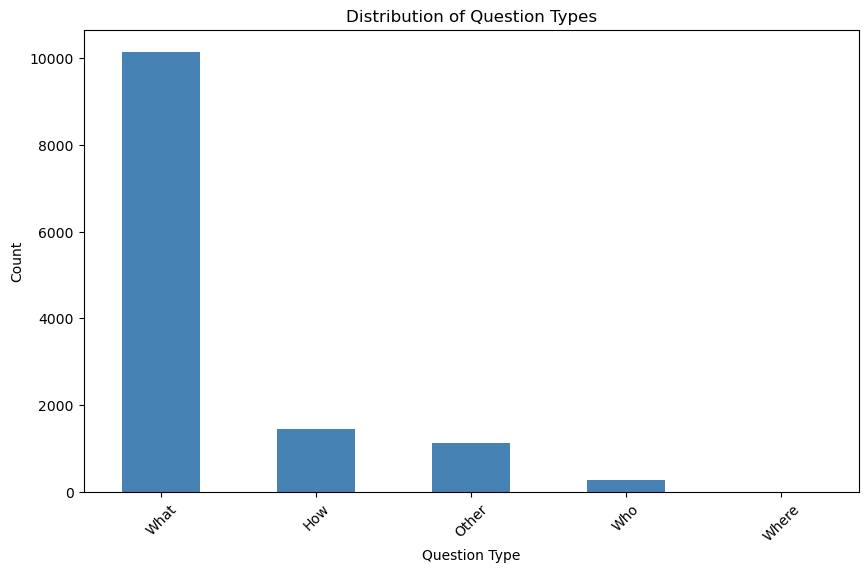

In [93]:
# Extract question types
def extract_question_type(question):
    question = question.lower().strip()
    if question.startswith('what'):
        return 'What'
    elif question.startswith('how'):
        return 'How'
    elif question.startswith('why'):
        return 'Why'
    elif question.startswith('when'):
        return 'When'
    elif question.startswith('where'):
        return 'Where'
    elif question.startswith('which'):
        return 'Which'
    elif question.startswith('who'):
        return 'Who'
    else:
        return 'Other'

df['question_type'] = df['input'].apply(extract_question_type)

# Question type distribution
question_counts = df['question_type'].value_counts()
print("\n QUESTION TYPE DISTRIBUTION ")
print(question_counts)

# Visualize question types
plt.figure(figsize=(10, 6))
question_counts.plot(kind='bar', color='steelblue')
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## MEDICAL TOPICS/DISEASES ANALYSIS



 TOP MEDICAL TERMS IN QUESTIONS
symptoms: 2254
treatment: 2083
disease: 1200
cancer: 414
clinic: 285
diabetes: 178
infection: 143
heart: 132
blood: 72
fever: 66
pain: 44
pressure: 41
virus: 39
drug: 21
therapy: 9


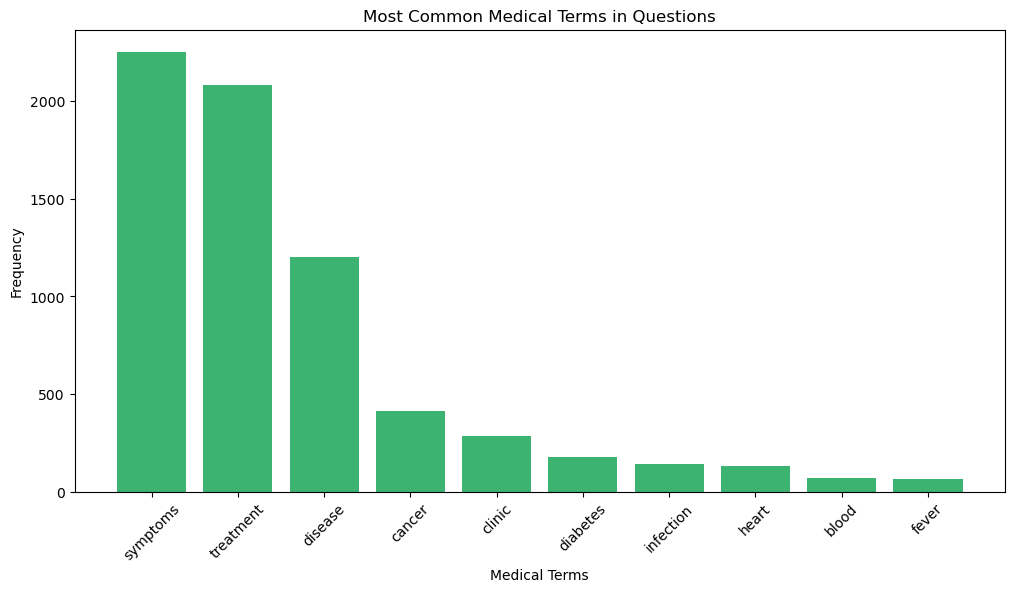

In [95]:

# Extract common medical terms
def extract_medical_terms(text):
    # Common medical keywords
    medical_terms = ['disease', 'treatment', 'symptoms', 'diagnosis', 'medication', 
                    'therapy', 'cancer', 'diabetes', 'heart', 'blood', 'pressure',
                    'infection', 'virus', 'bacteria', 'pain', 'fever', 'surgery',
                    'drug', 'vaccine', 'doctor', 'patient', 'hospital', 'clinic']
    
    text_lower = text.lower()
    found_terms = []
    for term in medical_terms:
        if term in text_lower:
            found_terms.append(term)
    return found_terms

# Find most common medical terms in questions
all_medical_terms = []
for question in df['input']:
    terms = extract_medical_terms(question)
    all_medical_terms.extend(terms)

term_counts = Counter(all_medical_terms)
print("\n TOP MEDICAL TERMS IN QUESTIONS")
for term, count in term_counts.most_common(15):
    print(f"{term}: {count}")

# Visualize top medical terms
top_terms = dict(term_counts.most_common(10))
plt.figure(figsize=(12, 6))
plt.bar(top_terms.keys(), top_terms.values(), color='mediumseagreen')
plt.title('Most Common Medical Terms in Questions')
plt.xlabel('Medical Terms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## WORD FREQUENCY ANALYSIS

In [97]:
# Function to get word frequency
def get_word_frequency(text_series, top_n=20):
    all_words = ' '.join(text_series).lower()
    # Remove punctuation and split
    words = re.findall(r'\b\w+\b', all_words)
    # Remove common stop words
    stop_words = {'the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 
                  'with', 'by', 'a', 'an', 'is', 'are', 'was', 'were', 'be', 'been',
                  'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could',
                  'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these',
                  'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him',
                  'her', 'us', 'them', 'my', 'your', 'his', 'her', 'its', 'our', 'their'}
    
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
    return Counter(filtered_words).most_common(top_n)

# Word frequency in questions
print("\n TOP WORDS IN QUESTIONS")
question_words = get_word_frequency(df['input'], 15)
for word, count in question_words:
    print(f"{word}: {count}")

# Word frequency in answers
print("\n TOP WORDS IN ANSWERS ")
answer_words = get_word_frequency(df['output'], 15)
for word, count in answer_words:
    print(f"{word}: {count}")


 TOP WORDS IN QUESTIONS
what: 10263
syndrome: 2816
symptoms: 2254
treatments: 2074
how: 1456
disease: 1144
related: 1020
genetic: 904
changes: 895
inherited: 860
people: 685
many: 674
affected: 674
type: 641
deficiency: 624

 TOP WORDS IN ANSWERS 
people: 16381
symptoms: 13919
symptom: 11231
blood: 11054
condition: 10622
from: 10569
disease: 10284
information: 9731
signs: 9711
syndrome: 9244
also: 8997
patients: 8964
gene: 8566
how: 8449
number: 8261


## WORD CLOUDS

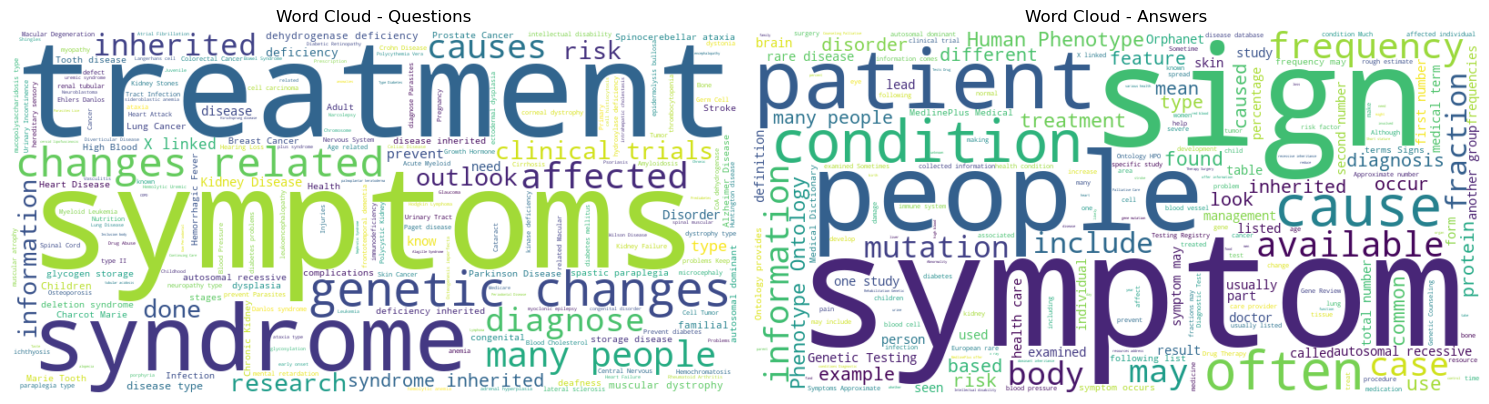

In [99]:
# Word cloud for questions
questions_text = ' '.join(df['input'])
wordcloud_questions = WordCloud(width=800, height=400, background_color='white').generate(questions_text)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_questions, interpolation='bilinear')
plt.title('Word Cloud - Questions')
plt.axis('off')

# Word cloud for answers
answers_text = ' '.join(df['output'])
wordcloud_answers = WordCloud(width=800, height=400, background_color='white').generate(answers_text)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_answers, interpolation='bilinear')
plt.title('Word Cloud - Answers')
plt.axis('off')

plt.tight_layout()
plt.show()

## CORRELATION ANALYSIS

Correlation between question and answer length: -0.007


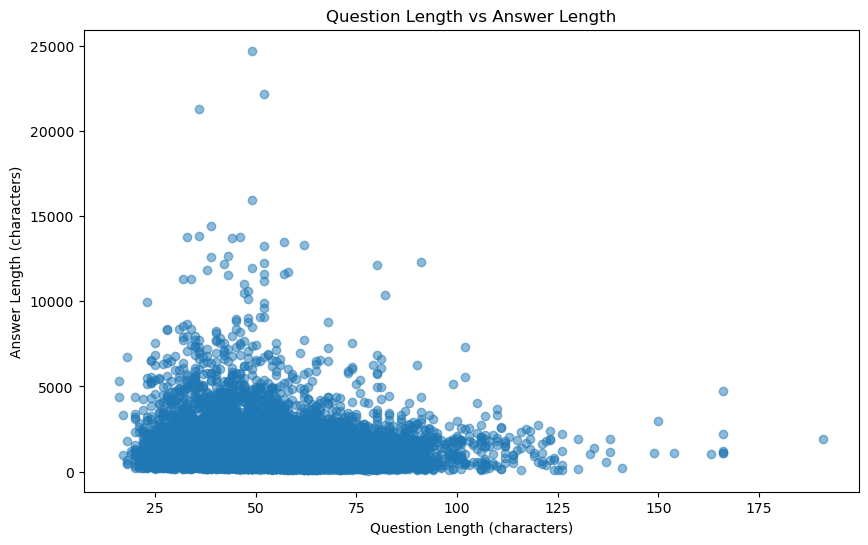

In [101]:
# Correlation between question and answer lengths
correlation = df['input_length'].corr(df['output_length'])

print(f"Correlation between question and answer length: {correlation:.3f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['input_length'], df['output_length'], alpha=0.5)
plt.xlabel('Question Length (characters)')
plt.ylabel('Answer Length (characters)')
plt.title('Question Length vs Answer Length')
plt.show()


## OUTLIER DETECTION

In [103]:


# Find questions with unusual lengths
q95_input = df['input_length'].quantile(0.95)
q95_output = df['output_length'].quantile(0.95)

long_questions = df[df['input_length'] > q95_input]
long_answers = df[df['output_length'] > q95_output]

print(f"Questions longer than 95th percentile ({q95_input:.0f} chars): {len(long_questions)}")
print(f"Answers longer than 95th percentile ({q95_output:.0f} chars): {len(long_answers)}")


Questions longer than 95th percentile (81 chars): 606
Answers longer than 95th percentile (3273 chars): 650


## SPECIFIC DISEASE ANALYSIS

In [105]:
# Find questions about specific diseases
diseases = ['diabetes', 'cancer', 'heart disease', 'asthma', 'hypertension', 
           'arthritis', 'depression', 'anxiety', 'obesity', 'pneumonia']

disease_counts = {}
for disease in diseases:
    count = df['input'].str.lower().str.contains(disease).sum()
    disease_counts[disease] = count


for disease, count in sorted(disease_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{disease}: {count}")

cancer: 414
diabetes: 178
arthritis: 46
heart disease: 34
pneumonia: 20
obesity: 17
asthma: 15
hypertension: 15
depression: 15
anxiety: 12


## DATA QUALITY CHECKS

In [111]:

# Check for duplicates
duplicated_questions = df['input'].duplicated().sum()
duplicated_answers = df['output'].duplicated().sum()
print(f"Duplicate questions: {duplicated_questions}")
print(f"Duplicate answers: {duplicated_answers}")

# Check for very short/long entries
very_short_questions = (df['input_length'] < 10).sum()
very_long_questions = (df['input_length'] > 500).sum()
very_short_answers = (df['output_length'] < 20).sum()
very_long_answers = (df['output_length'] > 2000).sum()

print(f"Very short questions (<10 chars): {very_short_questions}")
print(f"Very long questions (>500 chars): {very_long_questions}")
print(f"Very short answers (<20 chars): {very_short_answers}")
print(f"Very long answers (>2000 chars): {very_long_answers}")



Duplicate questions: 864
Duplicate answers: 60
Very short questions (<10 chars): 0
Very long questions (>500 chars): 0
Very short answers (<20 chars): 0
Very long answers (>2000 chars): 2034


In [113]:
duplicate_questions = df[df['input'].duplicated(keep=False)]
print("Duplicate Questions:")
print(duplicate_questions[['input', 'output']].head(10))

# Quick way to see exact duplicates
exact_duplicates = df[df.duplicated(keep=False)]
print("Exact Duplicates:")
print(exact_duplicates.head(10))

Duplicate Questions:
                                                input  \
5                What are the treatments for Stroke ?   
13         What causes Chronic Diarrhea in Children ?   
14  What are the treatments for Prostate Enlargeme...   
17        What are the treatments for Heart Failure ?   
19  Who is at risk for I Can Lower My Risk for Typ...   
24                   What causes Causes of Diabetes ?   
26  What are the treatments for High Blood Pressure ?   
32  What are the treatments for High Blood Cholest...   
37   What is (are) Financial Help for Diabetes Care ?   
42                 How to prevent Colorectal Cancer ?   

                                               output  
5   Treatment for a stroke depends on whether it i...  
13  Many diseases and disorders can cause chronic ...  
14  Treatment options for benign prostatic hyperpl...  
17  Early diagnosis and treatment can help people ...  
19  - Reach and maintain a reasonable body weight....  
24  Type 2 diab

## EDA COMPLETE